# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [3]:
print(iris.keys())

print(iris["filename"])

print(iris.data[0 : 10])

print(type(iris.data))

print(iris.target_names)

print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# we only take the first two features. 
X = iris.data[:, :2]
print(X.shape)

Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [13]:
print(X)

print(Y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [5]:
x = pd.DataFrame(iris.data, columns = iris["feature_names"])
x.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
print("target_names: " + str(iris["target_names"]))

target_names: ['setosa' 'versicolor' 'virginica']


In [8]:
#建立Target欄位與資料
y = pd.DataFrame(iris["target"], columns = ["target"])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [9]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x, y], axis = 1)
iris_data.head(15)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
iris_data_cut = iris_data[["sepal length (cm)", "petal length (cm)", "target"]]
iris_data_cut.head(15)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [11]:
#只選擇目標為0與1的資料
iris_data = iris_data_cut[iris_data_cut["target"].isin([0, 1])]
iris_data
#print(iris["data"].size / len(iris["feature_names"]))

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[["sepal length (cm)", "petal length (cm)"]], iris_data[["target"]], test_size = 0.2)

In [54]:
print(X_train.head())
print(X_train.shape)

    sepal length (cm)  petal length (cm)
74                6.4                4.3
62                6.0                4.0
82                5.8                3.9
12                4.8                1.4
16                5.4                1.3
(80, 2)


In [55]:
print(X_test.head())
print(X_test.shape)

    sepal length (cm)  petal length (cm)
71                6.1                4.0
80                5.5                3.8
81                5.5                3.7
30                4.8                1.6
64                5.6                3.6
(20, 2)


In [56]:
print(Y_train.head())
print(Y_train.shape)

    target
74       1
62       1
82       1
12       0
16       0
(80, 1)


In [57]:
print(Y_test.head())
print(Y_test.shape)

    target
71       1
80       1
81       1
30       0
64       1
(20, 1)


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [59]:
from IPython.display import Math
Math(r"x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}")


<IPython.core.display.Math object>

In [62]:
Math(r"x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}")

<IPython.core.display.Math object>

In [13]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return(minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c] - mu[c] )/ s[c]
        return df

In [18]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train[:10]

arr_y_train = np.array(Y_train)

In [83]:
arr_x_test = np.array(z_score(X_test, stats))
arr_x_test

arr_y_test = np.array(Y_test)

## use sklearn

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)   #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_)  #standard deviation

[5.49   2.8425]
[0.64548431 1.44540436]


In [22]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:10]

array([[-1.68865451, -0.99799063],
       [-0.75911992, -0.85962104],
       [-0.75911992,  0.45489001],
       [ 0.7901044 ,  1.14673793],
       [-0.91404235, -0.92880584],
       [-0.60419749, -0.99799063],
       [ 2.33932873,  1.28510752],
       [ 0.94502684,  0.80081397],
       [-1.68865451, -1.06717542],
       [-1.06896478, -0.85962104]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [23]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-1.06896478 -0.99799063]
 [-0.60419749  0.10896605]
 [-1.06896478 -0.99799063]
 [-0.75911992 -1.06717542]
 [-0.75911992 -0.92880584]
 [-0.75911992  0.31652042]
 [-0.91404235 -0.99799063]
 [-0.91404235 -0.92880584]
 [-0.75911992 -0.85962104]
 [ 0.7901044   1.14673793]]


you can also use fit_transform method (i.e., fit and then transform)    

In [25]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-1.06896478 -0.99799063]
 [-0.60419749  0.10896605]
 [-1.06896478 -0.99799063]
 [-0.75911992 -1.06717542]
 [-0.75911992 -0.92880584]
 [-0.75911992  0.31652042]
 [-0.91404235 -0.99799063]
 [-0.91404235 -0.92880584]
 [-0.75911992 -0.85962104]
 [ 0.7901044   1.14673793]]


In [28]:
print("mean of X_train_std:", np.round(X_train_std.mean(), 4))
print("std of X_train_std:", X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


51.37212384861952
29.370122411931483


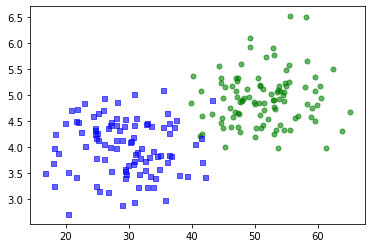

In [80]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30, 6, 100)
y2 = np.random.normal(4, 0.5, 100)

plt.scatter(x1, y1, c = "g", marker = "o", s = 25, alpha = 0.6)
plt.scatter(x2, y2, c = "b", marker = "s", s = 25, alpha = 0.6)

print(np.sum(x1) / len(x1))
print(np.sum(x2) / len(x2))

In [81]:
x_val = np.concatenate((x1, x2))
y_val = np.concatenate((y1, y2))

x_val.shape
y_val.shape

(200,)

In [44]:
def minmax_norm(X):
    return (X - X.min(axis = 0)) / (X.max(axis = 0) - (X.min(axis = 0)))

In [46]:
minmax_norm(x_val[:10])

array([1.        , 0.        , 0.9983583 , 0.64361986, 0.92986932,
       0.60173801, 0.77784755, 0.60359216, 0.22986439, 0.21095896])

In [47]:
minmax_norm(y_val[0:10])

array([0.57866398, 0.85198502, 1.        , 0.44628287, 0.        ,
       0.57385357, 0.7861812 , 0.3902704 , 0.50510906, 0.52582897])

In [82]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val = x_val.reshape(-1, 1)  #1D -> 2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:15])

(200,)
(200, 1)
[65.11233824]
[16.75772186]
[[0.88519647]
 [0.65168858]
 [0.78413687]
 [0.80118913]
 [0.67083845]
 [0.60807392]
 [0.47729002]
 [0.63997832]
 [0.92254341]
 [0.59080809]
 [0.76348067]
 [0.51557998]
 [0.66071979]
 [0.50834132]
 [0.88591956]]
